In [22]:
%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from utils import *

In [23]:
metagx_ge_df = pd.read_csv("/var/www/datasets/gse58644tamoxifenCombat.csv.xz", index_col="patient_ID")
metagx_st_df = pd.read_csv("/var/www/datasets/gse58644tamoxifenClinData.csv", index_col="patient_ID")
print("Num of null PosOutcome: %d" % metagx_st_df["posOutcome"].isna().sum())
pos_outcome = metagx_st_df["posOutcome"].dropna(axis=0)
print("Num of null PosOutcome: %d" % pos_outcome.isna().sum())

Num of null PosOutcome: 4
Num of null PosOutcome: 0


In [25]:
from sklearn.decomposition import KernelPCA
metagx_ge_outcome_df = pd.merge(metagx_ge_df, pos_outcome, left_index=True, right_index=True)
metagx_ge_outcome_df["posOutcome"] = metagx_ge_outcome_df["posOutcome"].astype(np.int64)
metagx_ge_outcome_df

,ISG15,SCNN1D,VWA1,GABRD,PRKCZ,SKI,RER1,PLCH2,PRDM16,ARHGEF16,...,TNXB,AGPAT1,AGER,GPSM3,BTNL2,PSMB8,HLA-DMB,COL11A2,RGL2,posOutcome
patient_ID,,,,,,,,,,,,,,,,,,,,,
GSM1415985,9.612867,3.337141,4.828266,3.384256,6.817438,4.564899,6.117260,3.041750,3.102261,4.600044,...,4.463778,7.092304,4.369718,7.505229,2.955421,7.196092,9.942442,3.716431,7.542659,1
GSM1415987,9.730935,3.597124,5.482631,3.902191,6.732714,4.265626,7.822248,3.544211,3.473109,5.180593,...,3.365340,7.344032,4.656234,5.733394,3.729621,7.021870,9.197970,3.061899,8.490872,1
GSM1415988,14.156929,3.791657,6.600758,3.714064,6.654115,3.851841,6.000204,3.721978,3.269700,5.066406,...,2.804961,7.251998,4.853827,5.481370,3.636771,9.321227,8.565490,3.367830,8.752680,1
GSM1415989,9.060971,3.459253,5.679683,3.746709,7.527316,4.835263,6.438621,3.409073,3.098049,5.528575,...,3.158005,8.071941,4.674114,5.433030,3.097742,6.950231,9.086278,4.268547,8.314558,1
GSM1415990,11.261235,4.136812,5.596330,3.293025,5.715109,3.574485,7.379707,4.211942,3.654857,5.496567,...,3.240997,5.468286,5.981336,7.235745,4.440982,9.213367,11.183572,5.721856,6.551936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1416296,8.920207,3.256875,5.226829,3.324742,6.671003,4.121552,7.507602,2.971716,2.757548,3.618074,...,4.374765,6.497444,4.352450,6.309613,3.099166,8.750141,10.235625,4.214627,7.745049,1
GSM1416297,8.678149,3.272300,4.972876,3.256116,6.958166,4.227906,8.574708,3.323792,2.999769,4.037637,...,3.255210,6.369440,4.058691,5.901456,3.351612,8.484219,9.713456,3.358371,8.417128,1
GSM1416299,6.398506,3.467455,5.141517,3.134175,6.420086,4.249261,7.470211,3.523582,3.062767,4.543686,...,3.342117,6.310628,3.555734,6.162580,3.390781,5.971364,7.289007,4.010458,8.569899,1


In [26]:
X_metagx, y_metagx = metagx_ge_outcome_df.drop(["posOutcome"], axis=1), metagx_ge_outcome_df["posOutcome"]

In [52]:
feats_100 = load_features("/var/www/datasets/feats_100_raw_nn.txt")
clf_nn_ap = XGBClassifier()
clf_nn_ap.load_model("datasets/models/clf_ge_ap_ft100.json")
clf_nn_acc = XGBClassifier()
clf_nn_acc.load_model("datasets/models/clf_ge_acc_ft100.json")

In [47]:
# missing_fts = ['TSTA3', 'SPN', 'ZNF434', 'C12orf49', 'HIST1H1C', 'KIAA1609', 'ZNF192', 'PHF15', 'HRASLS', 'IMPAD1']
feats_new = [x for x in feats_100 if x != 'ZNF192']
len(feats_new)

99

In [53]:
test_scores_metagx_ap_df = calc_scores(clf_nn_ap, X_metagx[feats_new], y_metagx)
test_scores_metagx_ap_df.mean()

balanced_accuracy      0.513274
recall_0               1.000000
precision_0            0.251701
recall_1               0.026549
precision_1            1.000000
auc                    0.549151
specificity            1.000000
average_precision_0    0.246667
dtype: float64

In [54]:
test_scores_metagx_acc_df = calc_scores(clf_nn_acc, X_metagx[feats_new], y_metagx)
test_scores_metagx_acc_df.mean()

balanced_accuracy      0.509567
recall_0               0.081081
precision_0            0.300000
recall_1               0.938053
precision_1            0.757143
auc                    0.547238
specificity            0.081081
average_precision_0    0.243166
dtype: float64

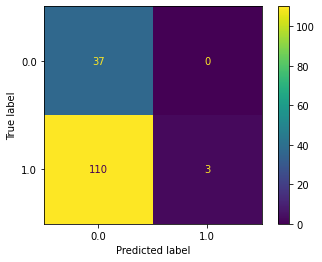

In [57]:
plot_confusion_matrix(clf_nn_ap, X_metagx[feats_new], metagx_ge_outcome_df["posOutcome"])

In [38]:
X_metagx.shape

(150, 8724)

In [44]:
import joblib
qn_transformer = joblib.load("datasets/models/qn_transformer.gz")
num_samples = X_metagx.shape[0]
X_metagx_q = qn_transformer.transform(X_metagx)
X_metagx_q = pd.DataFrame(X_metagx_q, columns=X_metagx.columns, index=X_metagx.index)
X_metagx_q

,ISG15,SCNN1D,VWA1,GABRD,PRKCZ,SKI,RER1,PLCH2,PRDM16,ARHGEF16,...,DOM3Z,TNXB,AGPAT1,AGER,GPSM3,BTNL2,PSMB8,HLA-DMB,COL11A2,RGL2
patient_ID,,,,,,,,,,,,,,,,,,,,,
GSM1415985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1415987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1415988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1415989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1415990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1416296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1416297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1416299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mmq_qnorm = MQNormalizer(scaler=MinMaxScaler())
X_train_metagx_mmq = mmq_qnorm.fit_transform(X_metagx_q)

X_train_metagx_mmq

,ISG15_overexpr,SCNN1D_overexpr,VWA1_overexpr,GABRD_overexpr,PRKCZ_overexpr,SKI_overexpr,RER1_overexpr,PLCH2_overexpr,PRDM16_overexpr,ARHGEF16_overexpr,...,DOM3Z_underexpr,TNXB_underexpr,AGPAT1_underexpr,AGER_underexpr,GPSM3_underexpr,BTNL2_underexpr,PSMB8_underexpr,HLA-DMB_underexpr,COL11A2_underexpr,RGL2_underexpr
patient_ID,,,,,,,,,,,,,,,,,,,,,
GSM1415985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1415987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1415988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1415989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1415990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1416296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1416297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1416299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ssq_qnorm = MQNormalizer(scaler=StandardScaler())
X_train_metagx_ssq = ssq_qnorm.fit_transform(X_metagx_q)

X_train_metagx_ssq

,ISG15_overexpr,SCNN1D_overexpr,VWA1_overexpr,GABRD_overexpr,PRKCZ_overexpr,SKI_overexpr,RER1_overexpr,PLCH2_overexpr,PRDM16_overexpr,ARHGEF16_overexpr,...,DOM3Z_underexpr,TNXB_underexpr,AGPAT1_underexpr,AGER_underexpr,GPSM3_underexpr,BTNL2_underexpr,PSMB8_underexpr,HLA-DMB_underexpr,COL11A2_underexpr,RGL2_underexpr
patient_ID,,,,,,,,,,,,,,,,,,,,,
GSM1415985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1415987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1415988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1415989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1415990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1416296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1416297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1416299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
feats_qnorm = load_features("/var/www/datasets/feats_100_mrmr_tamoxifen_qnormalized.txt")
clf_qnorm  = XGBClassifier()
clf_qnorm.load_model("datasets/models/clf_qnorm_ap_v2.json")

In [9]:
missing_qnorm = ['HIST1H4L_overexpr', 'SPN_overexpr', 'ZNF192_overexpr', 'WISP1_underexpr', 'HRASLS_overexpr', 'RDBP_underexpr', 'EMR2_underexpr', 'SPINLW1_underexpr', 'COL4A3BP_underexpr', 'ZNF434_underexpr', 'C10orf118_underexpr', 'IMPAD1_underexpr', 'TSTA3_underexpr', 'C12orf49_overexpr']

feats_qnorm_new = [x for x in feats_qnorm if x not in missing_qnorm]

In [17]:
test_scores_norm_df = calc_scores(clf_qnorm, X_metagx_q[feats_qnorm_new], y_metagx)

In [18]:
test_scores_norm_df.mean()

balanced_accuracy      0.550945
recall_0               0.756757
precision_0            0.274510
recall_1               0.345133
precision_1            0.812500
auc                    0.527625
specificity            0.756757
average_precision_0    0.232275
dtype: float64

In [45]:
clf_qnorm_spec = XGBClassifier()
clf_qnorm_spec.load_model("datasets/models/clf_q_spec_v2.json")

In [23]:
test_scores_norm_spec_df = calc_scores(clf_qnorm_spec, X_metagx_q[feats_qnorm_new], y_metagx)

In [24]:
test_scores_norm_spec_df.mean()

balanced_accuracy      0.557881
recall_0               0.540541
precision_0            0.294118
recall_1               0.575221
precision_1            0.792683
auc                    0.547477
specificity            0.540541
average_precision_0    0.228587
dtype: float64

In [11]:
state_df = pd.read_csv("datasets/state_and_outcome.csv", index_col="patient_ID")

state_sub_df = state_df[state_df["series_id"] == "GSE16391"]
print("Num samples: %d" % state_sub_df.shape[0])

Num samples: 48


In [12]:
ge_df = pd.read_csv("datasets/merged-combat15.csv", index_col="patient_ID")
ge_state_df = ge_df.loc[state_sub_df.index,:]
ge_state_df = ge_state_df.join(state_sub_df["posOutcome"])
ge_state_df

,MAGEA12,MAGEA11,KLF1,ADH7,MSH4,BIRC3,AKR1C4,GBX2,GCGR,SIGLEC9,...,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3,posOutcome
patient_ID,,,,,,,,,,,,,,,,,,,,,
411282,3.376456,3.675764,3.525858,3.678457,3.560768,6.546037,3.512793,3.591978,3.631756,4.052999,...,5.671591,7.033756,8.418641,3.511147,3.749158,5.982787,5.335800,4.743663,6.523905,1
411281,3.376456,3.675764,3.525858,3.678457,3.560768,7.920173,3.512793,3.591978,3.631756,4.052999,...,6.394843,7.151349,8.091389,3.517398,3.266016,5.970905,9.295212,5.826673,5.523001,1
411280,3.376456,3.675764,3.525858,3.678457,3.560768,5.330866,3.512793,3.591978,3.631756,4.052999,...,7.606838,6.721387,7.734367,3.501174,3.163260,5.819856,6.921927,5.170733,4.875947,1
411279,3.376456,3.675764,4.419012,4.103132,3.560768,4.937501,3.512793,3.591978,3.631756,4.052999,...,9.083744,5.562978,8.733130,4.126683,3.163260,4.735251,6.160656,5.114607,5.520120,1
411278,3.376456,3.675764,3.525858,3.678457,3.560768,5.901540,3.512793,3.591978,3.631756,4.367353,...,6.481258,6.719319,6.397008,4.600868,4.159223,5.492544,5.783343,5.377963,6.993573,1
411277,3.376456,3.842957,3.525858,3.710258,3.560768,6.719975,3.512793,3.591978,3.631756,4.052999,...,6.360792,6.280390,8.346215,3.510577,3.346482,6.027236,6.095912,5.148865,5.725183,1
411276,3.376456,3.675764,3.525858,3.678457,3.560768,4.674657,3.512793,3.591978,3.631756,4.052999,...,7.778536,5.688053,9.974463,3.282946,3.913976,6.082841,6.857922,5.847612,5.346325,1
411275,3.376456,3.675764,3.525858,3.678457,3.560768,4.856245,3.512793,3.591978,3.631756,4.525569,...,7.698365,6.861681,9.661669,3.510577,3.369933,4.902741,6.852204,4.975300,5.859381,1
411274,3.376456,3.675764,3.525858,3.678457,3.560768,5.458390,3.512793,3.591978,3.631756,4.052999,...,7.693292,7.050024,8.421701,3.510577,3.644419,5.499065,7.138588,6.509565,5.838942,1


In [46]:
clf_n_v1 = XGBClassifier()
clf_n_v1.load_model("datasets/models/clf_ge_ap_ft100.json")

In [14]:
X_combat, y_combat = ge_state_df.drop(["posOutcome"], axis=1), ge_state_df["posOutcome"]

In [15]:
test_scores_combat_df = calc_scores(clf_n_v1, X_combat[feats_100], y_combat)
test_scores_combat_df.mean()

balanced_accuracy      0.697368
recall_0               1.000000
precision_0            0.303030
recall_1               0.394737
precision_1            1.000000
auc                    0.826316
specificity            1.000000
average_precision_0    0.208333
dtype: float64

In [ ]:
clf_nn_ap

In [17]:
import joblib
qn_transformer = joblib.load("datasets/models/qn_transformer.gz")
X_combat_q = qn_transformer.transform(X_combat)
X_combat_q

,A4GALT_overexpr,AAAS_overexpr,AACS_overexpr,AADAC_overexpr,AAK1_overexpr,AAMP_overexpr,AANAT_overexpr,AARS_overexpr,AARSD1_overexpr,AASDHPPT_overexpr,...,ZNHIT2_underexpr,ZP2_underexpr,ZPBP_underexpr,ZSCAN2_underexpr,ZW10_underexpr,ZWINT_underexpr,ZXDC_underexpr,ZYX_underexpr,ZZEF1_underexpr,ZZZ3_underexpr
patient_ID,,,,,,,,,,,,,,,,,,,,,
411282,0.000000,0.000000,0.000000,0.669733,0.000000,0.000000,0.0,0.000000,0.765630,0.834907,...,0.631553,0.0,0.0,0.000000,0.000000,0.766844,0.000000,0.820419,0.818831,0.000000
411281,0.000000,0.580724,0.775720,0.669733,0.821861,0.503589,0.0,0.877733,0.000000,0.572260,...,0.617549,0.0,0.0,0.818463,0.000000,0.000000,0.000000,0.000000,0.000000,0.776048
411280,0.000000,0.000000,0.000000,0.669733,0.730419,0.000000,0.0,0.000000,0.762804,0.000000,...,0.653894,0.0,0.0,0.846029,0.619298,0.000000,0.000000,0.000000,0.765951,0.848251
411279,0.809597,0.000000,0.000000,0.669733,0.000000,0.792557,0.0,0.000000,0.686434,0.765540,...,0.000000,0.0,0.0,0.846029,0.000000,0.000000,0.853189,0.751288,0.772901,0.776370
411278,0.000000,0.000000,0.805138,0.669733,0.000000,0.750059,0.0,0.716420,0.842870,0.747828,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.715719,0.782911,0.707744,0.000000
411277,0.000000,0.000000,0.000000,0.669733,0.000000,0.000000,0.0,0.000000,0.000000,0.682604,...,0.632829,0.0,0.0,0.796876,0.000000,0.766508,0.000000,0.756714,0.768659,0.753487
411276,0.000000,0.779920,0.000000,0.669733,0.793885,0.692001,0.0,0.583194,0.637359,0.588708,...,0.784942,0.0,0.0,0.000000,0.000000,0.595286,0.000000,0.000000,0.000000,0.795763
411275,1.000000,0.000000,0.000000,0.669733,0.778666,0.000000,0.0,0.000000,0.000000,0.000000,...,0.632829,0.0,0.0,0.790585,0.000000,0.617781,0.828834,0.000000,0.790150,0.707469
411274,0.000000,0.758366,0.000000,0.669733,0.833844,0.000000,0.0,0.508101,0.000000,0.000000,...,0.632829,0.0,0.0,0.000000,0.000000,0.762597,0.711029,0.000000,0.000000,0.715913


In [18]:
test_scores_combat_qnorm_df = calc_scores(clf_qnorm, X_combat_q[feats_qnorm], y_combat)
test_scores_combat_qnorm_df.mean()

balanced_accuracy      0.568421
recall_0               0.900000
precision_0            0.236842
recall_1               0.236842
precision_1            0.900000
auc                    0.818421
specificity            0.900000
average_precision_0    0.197500
dtype: float64

In [19]:
test_scores_combat_qnorm_spec_df = calc_scores(clf_qnorm_spec, X_combat_q[feats_qnorm], y_combat)
test_scores_combat_qnorm_spec_df.mean()

balanced_accuracy      0.621053
recall_0               0.900000
precision_0            0.264706
recall_1               0.342105
precision_1            0.928571
auc                    0.747368
specificity            0.900000
average_precision_0    0.194643
dtype: float64

In [20]:
ge_state_df["posOutcome"].value_counts()

1    38
0    10
Name: posOutcome, dtype: int64

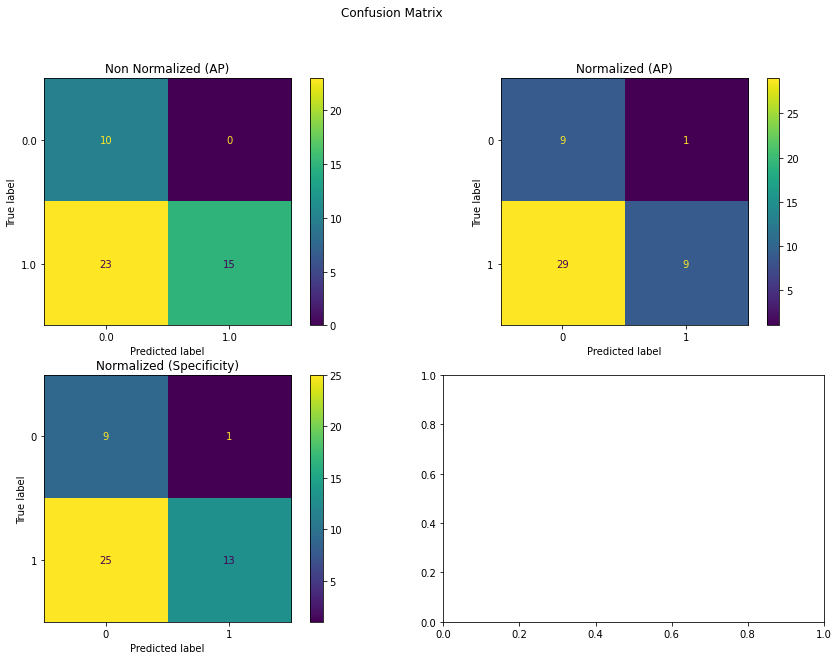

In [21]:
figs_1, axs_1 = plt.subplots(2, 2, figsize=(15, 10))
figs_1.suptitle("Confusion Matrix")
axs_1[0, 0].set_title("Non Normalized (AP)")
axs_1[0, 1].set_title("Normalized (AP)")
axs_1[1, 0].set_title("Normalized (Specificity)")
plot_confusion_matrix(clf_n_v1, X_combat[feats_100], y_combat, ax=axs_1[0, 0])
plot_confusion_matrix(clf_qnorm, X_combat_q[feats_qnorm], y_combat, ax=axs_1[0, 1])
plot_confusion_matrix(clf_qnorm_spec, X_combat_q[feats_qnorm], y_combat, ax=axs_1[1, 0])